In [1]:
# !pip install --user mediapipe
# !pip install --user git+https://github.com/sign-language-processing/datasets.git

In [2]:
# !wget "https://raw.githubusercontent.com/davidlainesv/TSSI-WLASL100/test/skeleton_graph.py"

--2023-02-25 08:23:25--  https://raw.githubusercontent.com/davidlainesv/TSSI-WLASL100/test/skeleton_graph.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29633 (29K) [text/plain]
Saving to: ‘skeleton_graph.py.1’

skeleton_graph.py.1 100%[===================>]  28.94K  --.-KB/s    in 0.001s  

2023-02-25 08:23:25 (36.1 MB/s) - ‘skeleton_graph.py.1’ saved [29633/29633]



In [162]:
import tensorflow_datasets as tfds
import sign_language_datasets.datasets
from sign_language_datasets.datasets.config import SignDatasetConfig
import itertools

In [164]:
config = SignDatasetConfig(name="only-poses",
                           version="1.0.0",
                           include_video=False,
                           include_pose="holistic",
                           fps=30)
autsl = tfds.load(name='autsl', data_dir="datasets", builder_kwargs={"config": config})

In [165]:
for datum in itertools.islice(autsl["train"], 0, 1):
  print(datum['id'].numpy().decode('utf-8'), datum['gloss_id'].numpy())

signer21_sample22 194


In [166]:
datum["pose"].keys()

dict_keys(['data', 'conf', 'fps'])

In [167]:
datum["pose"]["conf"].shape

TensorShape([58, 1, 543])

In [168]:
datum["pose"]["data"].shape

TensorShape([58, 1, 543, 4])

In [169]:
datum["pose"]["fps"]

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [170]:
import tensorflow as tf

tf.reduce_max(datum["pose"]["data"])

<tf.Tensor: shape=(), dtype=float32, numpy=767.67065>

In [171]:
tf.reduce_min(datum["pose"]["data"])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.80641854>

Plot with subset of MejiaPerez

In [172]:
from mediapipe.python.solutions.pose import PoseLandmark

BODY_JOINTS = [
    PoseLandmark.NOSE,
    PoseLandmark.RIGHT_SHOULDER.value,
    PoseLandmark.RIGHT_ELBOW.value,
    PoseLandmark.LEFT_SHOULDER.value,
    PoseLandmark.LEFT_ELBOW.value
]

RIGHT_EYEBROW_JOINTS = [46, 52, 53, 65]
LEFT_EYEBROW_JOINTS = [276, 282, 283, 295]
RIGHT_EYE = [7, 159, 155, 145]
LEFT_EYE = [382, 386, 249, 374]
MOUTH = [324, 13, 78, 14]
FACE_JOINTS = RIGHT_EYEBROW_JOINTS + \
        LEFT_EYEBROW_JOINTS + RIGHT_EYE + LEFT_EYE + MOUTH

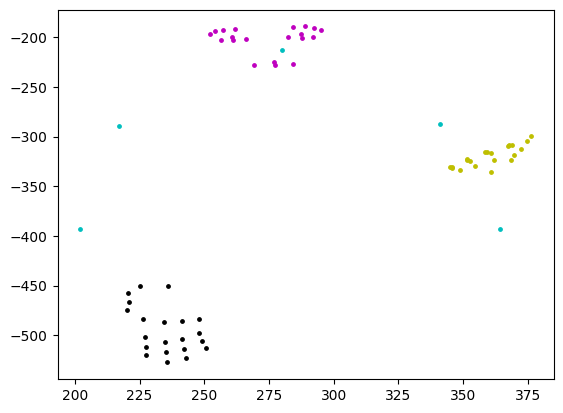

In [173]:
import numpy as np
import matplotlib.pyplot as plt

frame = 12

x_body = np.array(datum["pose"]["data"][frame, 0, 0:17, 0])
x_body = x_body[BODY_JOINTS]
y_body = np.array(datum["pose"]["data"][frame, 0, 0:17, 1])
y_body = y_body[BODY_JOINTS]
plt.scatter(x=x_body, y=-y_body, s=6, c="c")

x_face = np.array(datum["pose"]["data"][frame, 0, 33:(33+468), 0])
x_face = x_face[FACE_JOINTS]
y_face = np.array(datum["pose"]["data"][frame, 0, 33:(33+468), 1])
y_face = y_face[FACE_JOINTS]
plt.scatter(x=x_face, y=-y_face, s=6, c="m")

x_lhand = datum["pose"]["data"][frame, 0, (33+468):(33+468+21), 0]
y_lhand = datum["pose"]["data"][frame, 0, (33+468):(33+468+21), 1]
plt.scatter(x=x_lhand, y=-y_lhand, s=6, c="y")

x_rhand = datum["pose"]["data"][frame, 0, (33+468+21):(33+468+21+21), 0]
y_rhand = datum["pose"]["data"][frame, 0, (33+468+21):(33+468+21+21), 1]
plt.scatter(x=x_rhand, y=-y_rhand, s=6, c="k")

In [174]:
543-33-21-21

468

In [21]:
import numpy as np
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS, FACEMESH_TESSELATION

m = [(u, v) for (u, v) in list(FACEMESH_CONTOURS)]
n = [(u, v) for (u, v) in list(FACEMESH_TESSELATION)]
len(np.unique(m + n))

468

Plot with tssi order

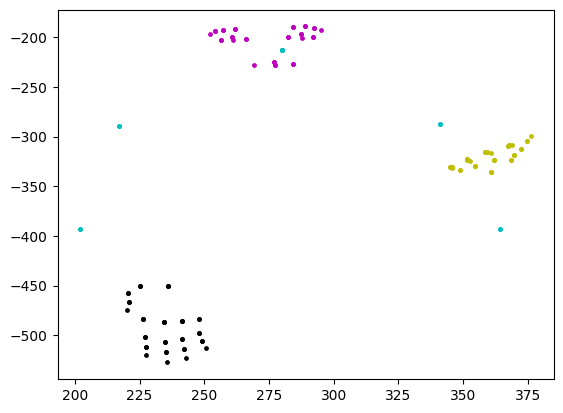

In [24]:
import matplotlib.pyplot as plt
from skeleton_graph import tssi_v2

graph, tssi_order = tssi_v2()

frame = 12

body_slice = slice(0, 17)
face_slie = slice(33, 33+468)
left_hand_slice = slice(33+468, 33+468+21)
right_hand_slice = slice(33+468+21, 33+468+21+21)

joints_idxs = [int(joint.split("_")[1]) for joint in tssi_order \
               if "pose" in joint ]
x_data = np.array(datum["pose"]["data"][frame, 0, body_slice, 0])[joints_idxs]
y_data = np.array(datum["pose"]["data"][frame, 0, body_slice, 1])[joints_idxs]
plt.scatter(x=x_data, y=-y_data, s=6, c="c")

joints_idxs = [int(joint.split("_")[1]) for joint in tssi_order \
               if "face" in joint ]
x_data = np.array(datum["pose"]["data"][frame, 0, face_slie, 0])[joints_idxs]
y_data = np.array(datum["pose"]["data"][frame, 0, face_slie, 1])[joints_idxs]
plt.scatter(x=x_data, y=-y_data, s=6, c="m")

joints_idxs = [int(joint.split("_")[1]) for joint in tssi_order \
               if "leftHand" in joint ]
x_data = np.array(datum["pose"]["data"][frame, 0, left_hand_slice, 0])[joints_idxs]
y_data = np.array(datum["pose"]["data"][frame, 0, left_hand_slice, 1])[joints_idxs]
plt.scatter(x=x_data, y=-y_data, s=6, c="y")

joints_idxs = [int(joint.split("_")[1]) for joint in tssi_order \
                 if "rightHand" in joint ]
x_data = np.array(datum["pose"]["data"][frame, 0, right_hand_slice, 0])[joints_idxs]
y_data = np.array(datum["pose"]["data"][frame, 0, right_hand_slice, 1])[joints_idxs]
plt.scatter(x=x_data, y=-y_data, s=6, c="k")

Process datum with processing class

In [175]:
from preprocessing import Preprocessing

pose = Preprocessing(tssi_order)(datum["pose"]["data"])
pose = pose.numpy()
pose.shape

(58, 135, 2)

Plot with tssi order

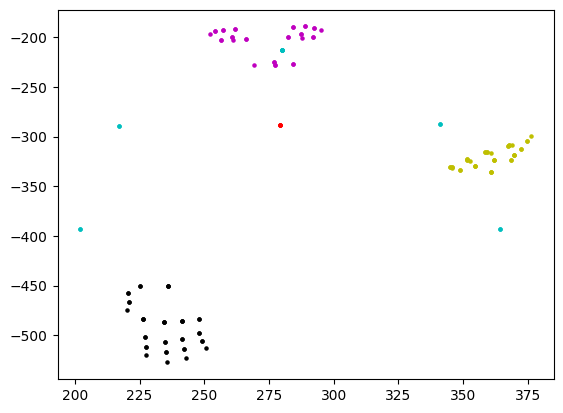

In [176]:
import matplotlib.pyplot as plt

face_idxs = [idx for idx, joint in enumerate(tssi_order) if "face" in joint]
pose_idxs = [idx for idx, joint in enumerate(tssi_order) if "pose" in joint]
left_hand_idxs = [idx for idx, joint in enumerate(tssi_order) if "leftHand" in joint]
right_hand_idxs = [idx for idx, joint in enumerate(tssi_order) if "rightHand" in joint]
extra_idxs = [idx for idx, joint in enumerate(tssi_order) if "root" in joint]

frame = 12

# pose
data_x = pose[frame, pose_idxs, 0]
data_y = pose[frame, pose_idxs, 1]
plt.scatter(x=data_x, y=-data_y, color="c", s=5)

# face
data_x = pose[frame, face_idxs, 0]
data_y = pose[frame, face_idxs, 1]
plt.scatter(x=data_x, y=-data_y, color="m", s=5)

# left_hand
data_x = pose[frame, left_hand_idxs, 0]
data_y = pose[frame, left_hand_idxs, 1]
plt.scatter(x=data_x, y=-data_y, color="y", s=5)

# right_hand
data_x = pose[frame, right_hand_idxs, 0]
data_y = pose[frame, right_hand_idxs, 1]
plt.scatter(x=data_x, y=-data_y, color="k", s=5)

# extra
data_x = pose[frame, extra_idxs, 0]
data_y = pose[frame, extra_idxs, 1]
plt.scatter(x=data_x, y=-data_y, color="r", s=5)